# Predicting Video Game Sales with Support Vector Machines

Another Method to predict Global Video Game Sales is support Vector Regression. Contrasting to Support Vector Machine Classification, in which we seek to fit a decision boundary in the form of a hyperplane that seeks to maximise the distance to  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [2]:
with open('./vgsales.csv', mode='r') as file:
    df = pd.read_csv(file)

df.head()
df.drop(columns=['Rank', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Name'], inplace=True)
#df.drop(columns=['Publisher'], inplace=True)

In [3]:
df.head()

,Platform,Year,Genre,Publisher,Global_Sales
0,Wii,2006.0,Sports,Nintendo,82.74
1,NES,1985.0,Platform,Nintendo,40.24
2,Wii,2008.0,Racing,Nintendo,35.82
3,Wii,2009.0,Sports,Nintendo,33.00
4,GB,1996.0,Role-Playing,Nintendo,31.37


In [4]:
for i in ['Platform', 'Genre', 'Publisher']:
    print(f'columns {i} - unique values: {df[i].unique().shape[0]}')

columns Platform - unique values: 31
columns Genre - unique values: 12
columns Publisher - unique values: 579


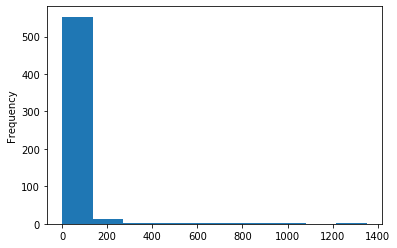

In [5]:
df.groupby('Publisher').size().plot(kind='hist')
#df['Publisher'].plot(kind='hist')

In [6]:
df.groupby('Publisher').size().sort_values(ascending=False).head(10)

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
dtype: int64

In [7]:
#df.groupby('Publisher').size().sort_values().head(10)

In [8]:
df.dtypes

Platform         object
Year            float64
Genre            object
Publisher        object
Global_Sales    float64
dtype: object

In [9]:
df.shape

(16598, 5)

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [11]:
df.isna().mean().sort_values(ascending=False)

Year            0.016327
Publisher       0.003494
Global_Sales    0.000000
Genre           0.000000
Platform        0.000000
dtype: float64

In [12]:
df.dropna(subset=['Year', 'Publisher'], inplace=True)
y = np.array(df['Global_Sales'])
df.drop(columns=['Global_Sales'], inplace=True)

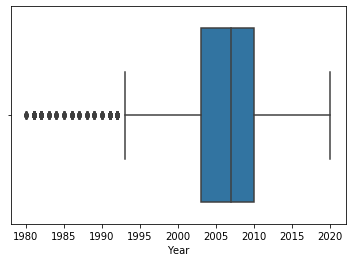

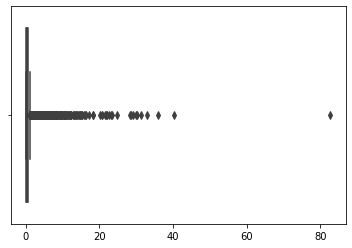

In [13]:
numeric_features = [j for j in df.columns if df[j].dtype in [np.int64, np.float64]]
categorical_features = list(filter(lambda x: x not in numeric_features, df.columns))

for i in numeric_features:
    sns.boxplot(df[i])
    plt.show()

sns.boxplot(y)
plt.show()

In [14]:
pipe_numeric = Pipeline(steps=[('encoding', MinMaxScaler())])
pipe_categorical = Pipeline(steps=[('scaling', OneHotEncoder())])

preprocessor_X = ColumnTransformer(transformers=[
    ('numerical', pipe_numeric, numeric_features),
    ('categorical', pipe_categorical, categorical_features)])

X = preprocessor_X.fit_transform(df)
transformer_y = RobustScaler()
transformer_y.fit(y.reshape(-1,1))
y = transformer_y.transform(y.reshape(-1,1))

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

In [15]:
train_y.ravel()

array([-0.28571429,  0.21428571,  0.35714286, ...,  4.26190476,
       -0.38095238,  0.0952381 ])

In [16]:
svm_regressor = SVR(kernel='poly', degree=3, C=10)
svm_regressor.fit(train_X, train_y)
svm_regressor.score(test_X, test_y)

/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.057437770480904704

In [17]:
mean_squared_error(train_y.ravel(), svm_regressor.predict(train_X))

9.562960517549602

In [18]:
mse =mean_squared_error(test_y.ravel(), svm_regressor.predict(test_X))

In [19]:
transformer_y.inverse_transform([[mse]])

array([[8.30333638]])